In [29]:
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
years = os.listdir('/home/mirela/Documents/snake/SnakeCLEF2023-small_size')

In [31]:
len(years)

34

In [34]:
df = []
y = 0
for year in tqdm(years):
    species = os.listdir(f'/home/mirela/Documents/snake/SnakeCLEF2023-small_size/{year}')
    for s in species:
        current_s = os.listdir(f'/home/mirela/Documents/snake/SnakeCLEF2023-small_size/{year}/{s}')
        number = len(current_s)
        df.append({'year': year, 'species': s, 'num': number})

100%|███████████████████████████████████████████| 34/34 [00:01<00:00, 23.79it/s]


In [36]:
data = pd.DataFrame(df)

In [57]:
distribution = data.groupby('species', as_index=False).num.sum().sort_values(by='num')

In [58]:
distribution['num'].sum()

153590

In [59]:
distribution['num'].mean()

86.09304932735427

In [60]:
distribution['num'].median()

49.5

In [66]:
distribution['num'].min(), distribution['num'].max()

(3, 1889)

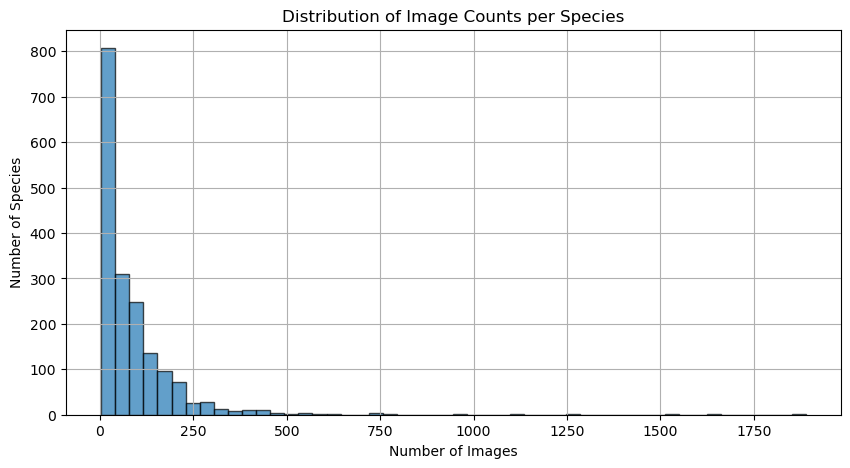

In [67]:
plt.figure(figsize=(10, 5))
plt.hist(distribution['num'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Image Counts per Species')
plt.xlabel('Number of Images')
plt.ylabel('Number of Species')
plt.grid(True)
plt.show()

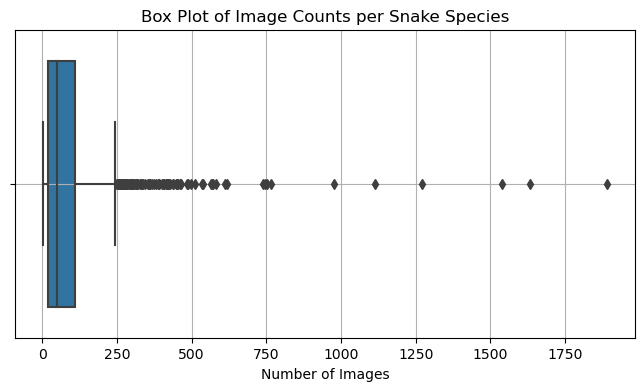

In [62]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=distribution['num'])
plt.title('Box Plot of Image Counts per Snake Species')
plt.xlabel('Number of Images')
plt.grid(True)
plt.show()

# Country encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
metadata = pd.read_csv('./metadata.csv')

In [74]:
metadata.groupby('binomial_name').country.unique()

binomial_name
Acanthophis antarcticus    [South Australia, New South Wales, Queensland,...
Acanthophis laevis           [Maluku, Western Province, Papua, Maluku Utara]
Acanthophis praelongus                                          [Queensland]
Acanthophis pyrrhus                  [Northern Territory, Western Australia]
Acanthophis rugosus                         [Northern Territory, Queensland]
                                                 ...                        
Zamenis lineatus           [Sicily, Latium, Apulia, Campania, Molise, Bas...
Zamenis longissimus        [Languedoc-Roussillon, Central Bohemia, Midi-P...
Zamenis persicus                                      [Mazandaran, Lankaran]
Zamenis scalaris           [Languedoc-Roussillon, Castille and Leon, Midi...
Zamenis situla             [Primorsko-Goranska, Crete, Central Macedonia,...
Name: country, Length: 1572, dtype: object

In [75]:
metadata

,observation_id,endemic,binomial_name,country,code,class_id,file_path
0,2670823,True,Zamenis lineatus,Sicily,IT,1567,1990/Zamenis_lineatus/3001242.jpg
1,96294178,False,Liasis olivaceus,Queensland,AU,816,1990/Liasis_olivaceus/159953206.jpeg
2,70108926,False,Xenoxybelis argenteus,Amazonas,VE,1561,1990/Xenoxybelis_argenteus/113910655.jpg
3,70108926,False,Xenoxybelis argenteus,Amazonas,VE,1561,1990/Xenoxybelis_argenteus/113910659.jpg
4,117935,False,Aspidelaps lubricus,Northern Cape,ZA,81,1990/Aspidelaps_lubricus/168477.JPG
...,...,...,...,...,...,...,...
270246,106432247,False,Boa constrictor,Cordoba,CO,136,2022/Boa_constrictor/178789489.jpeg
270247,106432247,False,Boa constrictor,Cordoba,CO,136,2022/Boa_constrictor/178789493.jpeg
270248,106432247,False,Boa constrictor,Cordoba,CO,136,2022/Boa_constrictor/178789501.jpeg
270249,106435822,False,Philothamnus semivariegatus,KwaZulu-Natal,ZA,1124,2022/Philothamnus_semivariegatus/178796098.jpg


In [103]:
def encode_labels(meta_file_path):
    
    metadata = pd.read_csv(meta_file_path)
    meta_cols = ['country', 'binomial_name']
    
    for col in meta_cols:
        encoder = LabelEncoder()
        metadata[col + '_encoded'] = encoder.fit_transform(metadata[col]) + 1
        
    return dict(zip(metadata.country, metadata.country_encoded))

In [104]:
encode_labels('./metadata.csv')

{'Sicily': 1759,
 'Queensland': 1553,
 'Amazonas': 62,
 'Northern Cape': 1352,
 'Karas': 881,
 'Languedoc-Roussillon': 1009,
 'Texas': 1902,
 'South Sulawesi': 1814,
 'Primorskiy': 1525,
 'Sisaket': 1775,
 'Bahia': 165,
 'Limburg': 1039,
 'Tamil Nadu': 1874,
 'South-West Province': 1816,
 'Primorsko-Goranska': 1526,
 "Kotayk'i Marz": 950,
 'Mara': 1130,
 'North Carolina': 1334,
 'Pennsylvania': 1462,
 'Liguria': 1034,
 'unknown': 2152,
 'Piedmont': 1490,
 'Otjozondjupa': 1424,
 'Rajasthan': 1567,
 'Gambela': 627,
 'Apure': 91,
 'Castille and Leon': 352,
 'New Jersey': 1302,
 'Florida': 606,
 'Illinois': 783,
 'Arizona': 113,
 'Guanacaste': 678,
 'Rayong': 1575,
 'Chon Buri': 428,
 'Bujumbura Mairie': 296,
 'Upper Takutu-Upper Essequibo': 1978,
 'Shabwah': 1736,
 'Lempira': 1024,
 'Oregon': 1409,
 'Souss-Massa-Draa': 1800,
 'California': 324,
 'Heredia': 734,
 'Arkansas': 114,
 'Napo': 1278,
 'Central Bohemia': 365,
 'Montana': 1217,
 'Victoria': 2030,
 'Oaxaca': 1376,
 "Ma'an": 1087,
 